# Stock Price Prediction- ADS_PHASE4

# TEAM NUMBER : 02

# Jeba Celina S(Team member)



##  Model Training and Evaluation 


In [14]:
#importing necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


file_path = r"C:\Users\Saranya\Downloads\archive (3)\MSFT.csv"
encoding = "ISO-8859-1"
df = pd.read_csv(file_path, encoding=encoding)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.062549,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.064783,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065899,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.064224,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.063107,47894400
...,...,...,...,...,...,...,...
8520,2019-12-31,156.770004,157.770004,156.449997,157.699997,157.699997,18369400
8521,2020-01-02,158.779999,160.729996,158.330002,160.619995,160.619995,22622100
8522,2020-01-03,158.320007,159.949997,158.059998,158.619995,158.619995,21116200
8523,2020-01-06,157.080002,159.100006,156.509995,159.029999,159.029999,20813700


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8525 entries, 0 to 8524
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8525 non-null   object 
 1   Open       8525 non-null   float64
 2   High       8525 non-null   float64
 3   Low        8525 non-null   float64
 4   Close      8525 non-null   float64
 5   Adj Close  8525 non-null   float64
 6   Volume     8525 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 466.3+ KB


In [16]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.062549,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.064783,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065899,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.064224,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.063107,47894400


In [17]:
#to display null values
df.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
8520,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False
8522,False,False,False,False,False,False,False
8523,False,False,False,False,False,False,False


In [18]:
#handling null values

df.fillna(df.mean(), inplace=True) 
df.dropna(inplace=True)

In [19]:
#scaling

scaler = StandardScaler()
df['Volume'] = scaler.fit_transform(df['Volume'].values.reshape(-1, 1))
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.062549,24.963577
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.064783,6.366058
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065899,1.868783
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.064224,0.187856
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.063107,-0.322861
...,...,...,...,...,...,...,...
8520,2019-12-31,156.770004,157.770004,156.449997,157.699997,157.699997,-1.081664
8521,2020-01-02,158.779999,160.729996,158.330002,160.619995,160.619995,-0.972368
8522,2020-01-03,158.320007,159.949997,158.059998,158.619995,158.619995,-1.011071
8523,2020-01-06,157.080002,159.100006,156.509995,159.029999,159.029999,-1.018845


In [20]:
#train_test split

X = df.drop('Volume', axis=1)
y = df['Volume']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
print("\n X_test info")
print(X_test.info())


 X_test info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1705 entries, 7505 to 7792
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1705 non-null   object 
 1   Open       1705 non-null   float64
 2   High       1705 non-null   float64
 3   Low        1705 non-null   float64
 4   Close      1705 non-null   float64
 5   Adj Close  1705 non-null   float64
dtypes: float64(5), object(1)
memory usage: 93.2+ KB
None


In [22]:
# Convert the 'Date' column to a datetime type in X_train and X_test
X_train['Date'] = pd.to_datetime(X_train['Date'])
X_test['Date'] = pd.to_datetime(X_test['Date'])

# Extract additional features from the date
X_train['Year'] = X_train['Date'].dt.year
X_test['Year'] = X_test['Date'].dt.year

X_train['Month'] = X_train['Date'].dt.month
X_test['Month'] = X_test['Date'].dt.month

X_train['Day'] = X_train['Date'].dt.day
X_test['Day'] = X_test['Date'].dt.day


In [23]:
# Drop the 'Date' column from both X_train and X_test
X_train.drop('Date', axis=1, inplace=True)
X_test.drop('Date', axis=1, inplace=True)


In [25]:
# Model Training (Linear Regression)
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error: 0.6676469210412154
R-squared (R2) Score: 0.20847357110397535


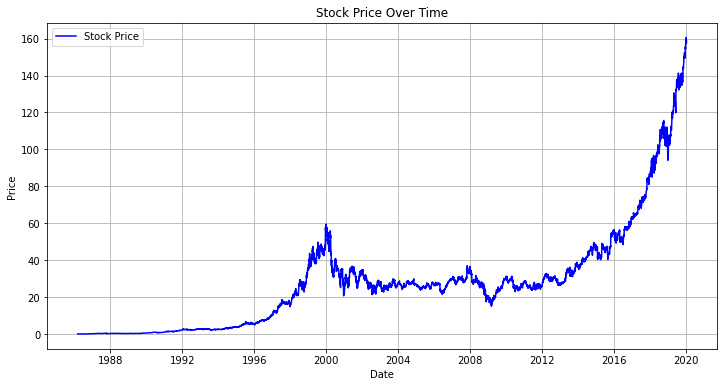

In [28]:

# Convert the 'Date' column to a datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Line Chart
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Stock Price', color='blue')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()



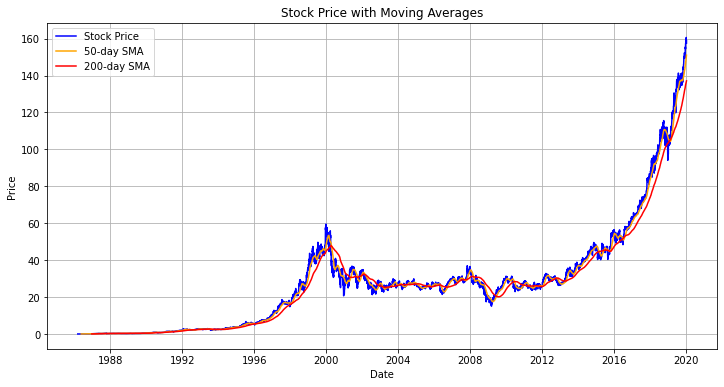

In [31]:
# Moving Averages (e.g., 50-day and 200-day)
df['SMA50'] = df['Close'].rolling(window=50).mean()
df['SMA200'] = df['Close'].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Stock Price', color='blue')
plt.plot(df['Date'], df['SMA50'], label='50-day SMA', color='orange')
plt.plot(df['Date'], df['SMA200'], label='200-day SMA', color='red')
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


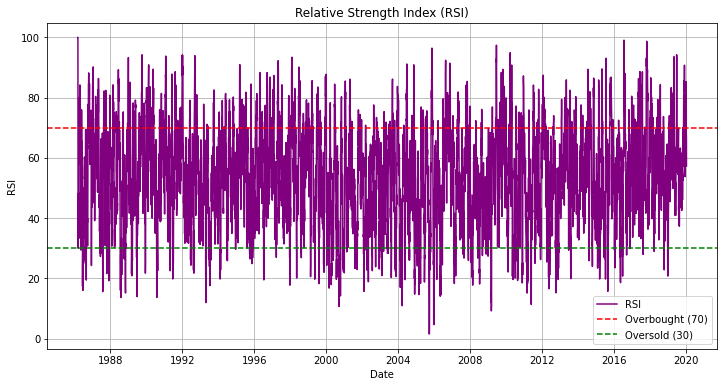

In [32]:
# RSI Chart
def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI'] = calculate_rsi(df)

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid()
plt.show()
